In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
breed_data = pd.read_csv("/content/drive/My Drive/Pet_Adoption_Dataset/Breed Category Data")

In [98]:
test_data =  pd.read_csv("/content/drive/My Drive/Pet_Adoption_Dataset/Test Data.csv")

In [104]:
test_data = test_data.drop(["Unnamed: 0"], axis=1)

In [105]:
test_data.head()

,condition,color_type,length(m),height(cm),X1,X2
0,-1.206301,-1.160783,1.266460,1.176432,-0.814202,0.694493
1,0.143981,0.694711,-1.536548,-1.596722,-0.814202,-1.010281
2,0.143981,-1.160783,-0.913657,1.059409,-0.814202,0.694493
3,0.143981,-1.160783,-0.740632,-1.461991,0.254101,-1.010281
4,0.143981,-0.490744,0.712779,0.267189,-0.814202,0.694493


In [7]:
breed_data.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category
0,1.494263,-0.336119,1.024225,-1.514343,1.169789,1.262750,-0.953477
1,0.143981,1.467833,0.747384,-1.020842,1.169789,1.262750,-0.953477
2,0.143981,-0.490744,-1.225103,1.035542,1.475018,-0.157894,2.221802
3,0.143981,1.467833,0.401334,-0.741371,-0.814202,-1.010281,-0.953477
4,1.494263,-1.160783,-0.013926,-1.261818,1.932862,-0.157894,-0.953477


In [27]:
breed_data["breed_category"].value_counts()

-0.953477    9000
 0.634162    8357
 2.221802    1477
Name: breed_category, dtype: int64

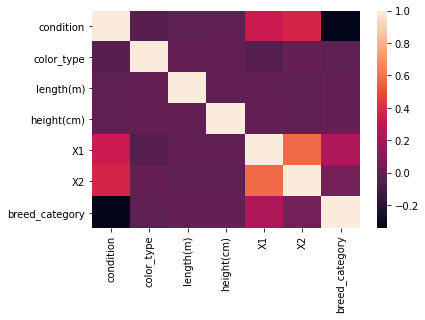

In [12]:
sns.heatmap(breed_data.corr())

In [13]:
breed_data.shape

(18834, 7)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breed_data.iloc[: , :-1], breed_data.iloc[:,-1], test_size= 0.2, random_state =  1 )
# X_train, X_val, y_train, y_val = train_test_split(X_train , y_train, test_size = 0.2 , random_state = 1)

In [25]:
print(X_train.shape, X_test.shape)

(15067, 6) (3767, 6)


In [30]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [35]:
print(y_train, y_test)

[2 0 1 ... 0 1 1] [0 0 0 ... 2 1 1]


# **Logistic Regression**

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
train_accuracy = lr.score(X_train, y_train)

print("test accuracy", accuracy)
print("train accuracy", train_accuracy)

test accuracy 0.7658614281921954
train accuracy 0.777128824583527


# **Decision Tree**

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy =  dt.score(X_test, y_test)
train_accuracy = dt.score(X_train, y_train)

print("test accuracy",accuracy)
print("train accuracy", train_accuracy)

test accuracy 0.8494823466949828
train accuracy 1.0


# **Naive Bayes**

In [62]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = nb.score(X_test, y_test)
train_accuracy = nb.score(X_train, y_train)

print("test acc",accuracy)
print("train acc", train_accuracy)

test acc 0.5234934961507831
train acc 0.5287714873564744


# **SGD**

In [63]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier()
SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_test)
accuracy = SGD.score(X_test, y_test)
train_accuracy = SGD.score(X_train, y_train)

print("test acc",accuracy)
print("train acc", train_accuracy)

test acc 0.7719670825590655
train acc 0.7837658458883653


# **RandomForest**

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
train_accuracy = rf.score(X_train, y_train)
test_accuracy = rf.score(X_test, y_test)

print("train acc", train_accuracy)
print("test acc", test_accuracy)

train acc 1.0
test acc 0.8500132731616671


# **SVM**

In [99]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
train_accuracy = svm.score(X_train, y_train)
test_accuracy= svm.score(X_test, y_test)

print("train acc", train_accuracy)
print("test acc", test_accuracy)

train acc 0.7087011349306431
test acc 0.7021502521900717


# **KNN**

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
train_accuracy = knn.score(X_train, y_train)
test_accuracy= knn.score(X_test, y_test)

print("train acc", train_accuracy)
print("test acc", test_accuracy)

train acc 0.8952014335966019
test acc 0.8287762144942925


## **SVM gave the best classification out of all the models**

In [106]:
breed_category = svm.predict(test_data)
print(breed_category)

[2 2 2 ... 2 2 2]


# **Pet Classifier**

In [69]:
pet_data = pd.read_csv("/content/drive/My Drive/Pet_Adoption_Dataset/Pet Category Data")

In [70]:
pet_data.head()

,condition,color_type,length(m),height(cm),X1,X2,pet_category
0,1.494263,-0.336119,1.024225,-1.514343,1.169789,1.262750,-0.987801
1,0.143981,1.467833,0.747384,-1.020842,1.169789,1.262750,0.405149
2,0.143981,-0.490744,-1.225103,1.035542,1.475018,-0.157894,3.191051
3,0.143981,1.467833,0.401334,-0.741371,-0.814202,-1.010281,0.405149
4,1.494263,-1.160783,-0.013926,-1.261818,1.932862,-0.157894,-0.987801


In [72]:
pet_data["pet_category"].value_counts()

 0.405149    10621
-0.987801     7184
 3.191051      941
-2.380752       88
Name: pet_category, dtype: int64

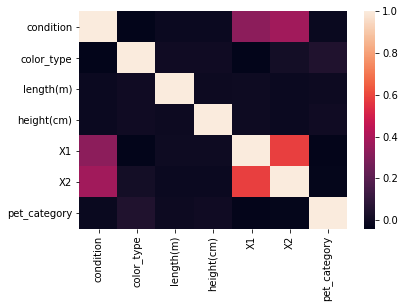

In [73]:
sns.heatmap(pet_data.corr())

In [78]:
pet_data.shape

(18834, 7)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pet_data.iloc[: , :-1], pet_data.iloc[:,-1], test_size= 0.2, random_state =  1 )

In [77]:
print(X_train.shape, X_test.shape)

(15067, 6) (3767, 6)


In [79]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

# **Log Reg**

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = lr.score(X_test, y_test)
train_accuracy = lr.score(X_train, y_train)

print("test accuracy", accuracy)
print("train accuracy", train_accuracy)

test accuracy 0.6548977966551632
train accuracy 0.6596535474878874


# **Des Tree**

In [81]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy =  dt.score(X_test, y_test)
train_accuracy = dt.score(X_train, y_train)

print("test accuracy",accuracy)
print("train accuracy", train_accuracy)

test accuracy 0.8149721263604991
train accuracy 0.9998672595739032


# **naive Bayes**

In [83]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = nb.score(X_test, y_test)
train_accuracy = nb.score(X_train, y_train)

print("test acc",accuracy)
print("train acc", train_accuracy)

test acc 0.6541014069551367
train acc 0.6540784495918232


# **SGD**

In [84]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier()
SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_test)
accuracy = SGD.score(X_test, y_test)
train_accuracy = SGD.score(X_train, y_train)

print("test acc",accuracy)
print("train acc", train_accuracy)

test acc 0.6434828776214494
train acc 0.6386141899515497


# **Random Forest**

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
train_accuracy = rf.score(X_train, y_train)
test_accuracy = rf.score(X_test, y_test)

print("train acc", train_accuracy)
print("test acc", test_accuracy)

train acc 0.9998672595739032
test acc 0.8311653835943722


# **SVC**

In [88]:
from sklearn.svm import SVC

svm1 = SVC()
svm1.fit(X_train, y_train)
train_accuracy = svm1.score(X_train, y_train)
test_accuracy= svm1.score(X_test, y_test)

print("train acc", train_accuracy)
print("test acc", test_accuracy)

train acc 0.7087011349306431
test acc 0.7021502521900717


# **KNN**

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
train_accuracy = knn.score(X_train, y_train)
test_accuracy= knn.score(X_test, y_test)

print("train acc", train_accuracy)
print("test acc", test_accuracy)

train acc 0.7870179863277361
test acc 0.6801168038226706


In [107]:
pet_category = svm1.predict(test_data)
print(pet_category)

8072


In [91]:
ls

drive/  sample_data/


In [92]:
submission_file=pd.read_csv("/content/drive/My Drive/Pet_Adoption_Dataset/Submission Data")

In [95]:
submission_file.shape

(8072, 1)

In [108]:
submission_file["breed_category"] = breed_category
submission_file["pet_category"] = pet_category

In [109]:
submission_file.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,2,2
1,ANSL_76663,2,2
2,ANSL_58259,2,2
3,ANSL_67171,1,1
4,ANSL_72871,2,2


In [110]:
submission_file.to_csv("Submission File.csv")